In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
import heapq

# Node Class represents a state in the search tree.
class Node:
    def __init__(self, state, parent=None, action=None, path_cost=0):
        self.state = state  # The current position of the agent in the grid.
        self.parent = parent  # The node in the search tree that generated this node.
        self.action = action  # The action taken to get to this state.
        self.path_cost = path_cost  # Cost from the start node to this node.

    # Comparison operator for priority queue.
    def __lt__(self, other):
        return self.path_cost < other.path_cost

For a star search we need to define a priority queue and heuristic. here we have taken the manhattan distance as the heuristic


In [2]:
class PriorityQueue:
    def __init__(self):
        self.elements = []

    def empty(self):
        return len(self.elements) == 0

    def put(self, item, priority):
        heapq.heappush(self.elements, (priority, item))

    def get(self):
        return heapq.heappop(self.elements)[1]
def heuristic(a, b):
    """
    Calculate the Manhattan distance between two points a and b.

    Parameters:
    - a: Tuple representing the x and y coordinates of point a (e.g., (x1, y1))
    - b: Tuple representing the x and y coordinates of point b (e.g., (x2, y2))

    Returns:
    - The Manhattan distance between points a and b.
    """
    (x1, y1) = a
    (x2, y2) = b
    return abs(x1 - x2) + abs(y1 - y2)

Implement a class Environment that generates a 10x10 grid. Dynamically
place obstacles, a start position, and an end position within the grid.

In [3]:
# Environment Class represents the grid and handles state transitions.
class Environment:
    def __init__(self, grid, start, goal):
        self.grid = grid  # The grid layout where 1 represents an obstacle and 0 is free space.
        self.initial = start  # Starting position of the agent.
        self.goal = goal  # Goal position the agent aims to reach.

    # Returns the possible actions from a given state.
    def actions(self, state):
        possible_actions = ['UP', 'DOWN', 'LEFT', 'RIGHT']
        x, y = state

        # Remove impossible actions based on grid boundaries and obstacles.
        if x == 0 or self.grid[x - 1][y] == 1:
            possible_actions.remove('UP')
        if x == len(self.grid) - 1 or self.grid[x + 1][y] == 1:
            possible_actions.remove('DOWN')
        if y == 0 or self.grid[x][y - 1] == 1:
            possible_actions.remove('LEFT')
        if y == len(self.grid[0]) - 1 or self.grid[x][y + 1] == 1:
            possible_actions.remove('RIGHT')

        return possible_actions

    # Returns the state resulting from taking a given action at a given state.
    def result(self, state, action):
        x, y = state
        if action == 'UP':
            return (x - 1, y)
        if action == 'DOWN':
            return (x + 1, y)
        if action == 'LEFT':
            return (x, y - 1)
        if action == 'RIGHT':
            return (x, y + 1)

    # Checks if the goal has been reached.
    def is_goal(self, state):
        return state == self.goal

1. Robot
• Implement a class Agent with movement capabilities and tracking of its
current position. Include methods to manage the robot's energy levels and
battery status, incorporating task optimization and safety for efficient and safe
navigation.
• Battery Management: The robot starts with a battery level of 100%. For each
move from one block to another, the battery level decreases by 10%. If the
battery level reaches 0%, the robot must recharge to 100% before continuing.

2. Simulation
• Simulate the robot's movement through the 10x10 grid with randomly placed
obstacles, accounting for energy consumption and managing energy levels to
complete tasks.
3. Pathfinding Algorithms
• Students are required to implement two pathfinding algorithms: Uniform Cost
Search (UCS) and A* (A Star). Evaluate these algorithms based on the number
of times the robot needs to recharge its battery while traversing the path to the
goal. This will determine the best algorithm for this environment.

In [4]:
class Agent:
    def __init__(self, env):
        self.env = env  # The environment in which the agent operates.
        self.battery = 100 # int((np.random.randint(100))/10)*10 Initial battery level

    #battery section
    def recharge(self):
        self.battery = 100
    
    def current_charge(self):
        return self.battery
    
    # Performs UCS search to find a path from the initial state to the goal.
    def uniform_cost_search(self):
        frontier = PriorityQueue()  # Priority queue for UCS.
        frontier.put(Node(self.env.initial, path_cost=0), 0)
        came_from = {self.env.initial: None}
        cost_so_far = {self.env.initial: 0}

        while not frontier.empty():
            current_node = frontier.get()

            if self.env.is_goal(current_node.state):
                return self.reconstruct_path(came_from, current_node.state)

            for action in self.env.actions(current_node.state):
                new_state = self.env.result(current_node.state, action)
                new_cost = cost_so_far[current_node.state] + 1  # Assuming uniform cost for simplicity; adjust if varying costs.
                if new_state not in cost_so_far or new_cost < cost_so_far[new_state]:
                    cost_so_far[new_state] = new_cost
                    priority = new_cost
                    frontier.put(Node(new_state, current_node, action, new_cost), priority)
                    came_from[new_state] = current_node.state
        return []
    
    # This is a_star_search 
    def a_star_search(self):
        #self.recharge()
        # The start node is created with a path cost of 0.
        start_node = Node(self.env.initial, path_cost=0)
        frontier = PriorityQueue()
        frontier.put(start_node, 0)  # Priority is f-cost, initially the heuristic cost from start to goal
        came_from = {self.env.initial: None}  # Tracks the best path to a node
        cost_so_far = {self.env.initial: 0}  # Tracks the g-cost (cost so far to reach a node)

        while not frontier.empty():
            current_node = frontier.get()

            if self.env.is_goal(current_node.state):
                return self.reconstruct_path(came_from, current_node.state)

            for action in self.env.actions(current_node.state):
                new_state = self.env.result(current_node.state, action)
                new_cost = cost_so_far[current_node.state] + 1  # Assuming uniform cost for simplicity
                if new_state not in cost_so_far or new_cost < cost_so_far[new_state]:
                    cost_so_far[new_state] = new_cost
                    priority = new_cost + heuristic(new_state, self.env.goal)  # f-cost = g-cost + h-cost
                    frontier.put(Node(new_state, current_node, action, new_cost), priority)
                    came_from[new_state] = current_node.state

        return []
    
    # Performs Uniform Cost Search to find the lowest cost path from the initial state to the goal.
    def uniform_cost_search(self):
        #self.recharge()
        frontier = PriorityQueue()  # Priority queue for UCS.
        frontier.put(Node(self.env.initial, path_cost=0), 0)
        came_from = {self.env.initial: None}
        cost_so_far = {self.env.initial: 0}

        while not frontier.empty():
            current_node = frontier.get()

            if self.env.is_goal(current_node.state):
                return self.reconstruct_path(came_from, current_node.state)

            for action in self.env.actions(current_node.state):
                new_state = self.env.result(current_node.state, action)
                new_cost = cost_so_far[current_node.state] + 1  # Assuming uniform cost for simplicity; adjust if varying costs.
                if new_state not in cost_so_far or new_cost < cost_so_far[new_state]:
                    cost_so_far[new_state] = new_cost
                    priority = new_cost
                    frontier.put(Node(new_state, current_node, action, new_cost), priority)
                    came_from[new_state] = current_node.state

        return []

    # Reconstructs the path from start to goal by following the came_from links.
    def reconstruct_path(self, came_from, current):
        path = []
        #charge = []
        while current in came_from:
            path.append(current)
            current = came_from[current]

        path.append(self.env.initial)  # Start is not included in the came_from map.
        path.reverse()  # Reverse to get the path from start to goal.
        return path           
    
    # Battery Charging point and management
    def battery_manager(self, path):
        self.recharge()
        charge = []

        for i in range(len(path)):
            if self.current_charge() <= 10:
                charge.append(path[i])
                self.recharge()
                pass
            elif path[i] != (0, 0):
                self.battery = self.current_charge() - 10
                pass
            print(f"{path[i]} = {self.current_charge()}")
                
                
        return charge 


For visualization


In [5]:
# Visualization Function plots the grid and the found path.
def visualize_grid_and_path(grid, path, charge):
    grid_array = np.array(grid)  # Convert grid to numpy array for easy plotting.
    fig, ax = plt.subplots()
    ax.imshow(grid_array, cmap='Greys', alpha=0.3)  # Grid background.
    start = path[0]
    goal = path[-1]
    ax.plot(goal[1], goal[0], 'bs', markersize=10)  # goal position in blue.
    ax.plot(start[1], start[0], 'ks', markersize=10)  # start position in black.
    if (charge is not None) :
        xc, yc = zip(*charge) 
        ax.plot(yc, xc, 'gs', markersize=10)# charging position are in green.
     
    xs, ys = zip(*path)  # Extract X and Y coordinates of the path.
    ax.plot(ys, xs, 'r-', linewidth=2)  # Plot the path in red.
    ax.set_xticks(np.arange(-.5, len(grid[0]), 1), minor=True)
    ax.set_yticks(np.arange(-.5, len(grid), 1), minor=True)
    
    ax.grid(which="minor", color="b", linestyle='-', linewidth=1)
    ax.tick_params(which="minor", size=0)
    ax.tick_params(which="major", bottom=False, left=False, labelbottom=False, labelleft=False)
    plt.show()

driver code. 

<h3>output serial</h3>
<hr>
1st --> UFS<br>
2nd --> A Star 

This is the solution using Uniform Cost Search algorithm
(0, 0) = 100
(0, 0) = 100
(1, 0) = 90
(2, 0) = 80
(3, 0) = 70
(4, 0) = 60
(5, 0) = 50
(5, 1) = 40
(6, 1) = 30
(6, 2) = 20
(6, 3) = 10
(6, 4) = 100
(6, 5) = 90
(6, 6) = 80
(6, 7) = 70
(7, 7) = 60
(8, 7) = 50
(8, 8) = 40
(8, 9) = 30
(9, 9) = 20
Charging Points: [(6, 4)]


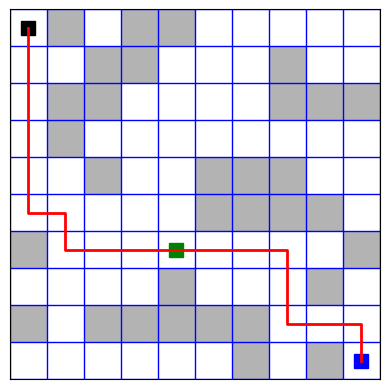

This is the solution using A* Search algorithm
(0, 0) = 100
(0, 0) = 100
(1, 0) = 90
(2, 0) = 80
(3, 0) = 70
(4, 0) = 60
(5, 0) = 50
(5, 1) = 40
(6, 1) = 30
(6, 2) = 20
(6, 3) = 10
(6, 4) = 100
(6, 5) = 90
(7, 5) = 80
(7, 6) = 70
(7, 7) = 60
(8, 7) = 50
(8, 8) = 40
(8, 9) = 30
(9, 9) = 20
Charging Points: [(6, 4)]


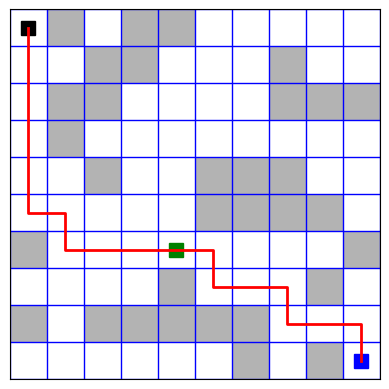

In [6]:
def generate_random_grid(size, obstacle_probability):
    return np.random.choice([0, 1], size=(size, size), p=[1-obstacle_probability, obstacle_probability])

# Define the size of the grid and the probability of an obstacle in each cell
grid_size = 10
obstacle_probability = 0.2  # 20% chance of being an obstacle

# Generate a random grid
grid = generate_random_grid(grid_size, obstacle_probability)

# Define start and goal positions
start = (0, 0)
goal = (grid_size - 1, grid_size - 1)

# Ensure start and goal are not obstacles
grid[start] = 0
grid[goal] = 0

# Create the environment and agent
environment = Environment(grid, start, goal)
agent = Agent(environment)

# Solve the problem with the UCS algorithm
print("This is the solution using Uniform Cost Search algorithm")
solution_path_ucs = agent.uniform_cost_search()
charging_point = agent.battery_manager(solution_path_ucs)
#print("Solution Path:", solution_path_ucs)
print("Charging Points:", charging_point)

# Visualize the solution
visualize_grid_and_path(grid, solution_path_ucs, charging_point) 

# Solve the problem with the A* algorithm
print("This is the solution using A* Search algorithm")
solution_path_a_star = agent.a_star_search()
charging_point = agent.battery_manager(solution_path_a_star)
#print("Solution Path:", solution_path_a_star)
print("Charging Points:", charging_point)

# Visualize the solution
visualize_grid_and_path(grid, solution_path_a_star, charging_point)